# Time series analysis and forcasting of the Nigerian food prices

In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline
from pylab import rcParams
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

In [2]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)

## Importing data, creating time series dataset

In [3]:
original = pd.read_csv('..../input/full NFP watch.csv')

In [4]:
foodprice= original.set_index('Fooditem').T #transpose the initial data set

In [5]:
foodprice.head()

Fooditem,Agric eggs medium size,Agric eggs(medium size price of one),"Beans brown,sold loose",Beans:white black eye. sold loose,Beef Bone in,"Beef,boneless",Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),Catfish (obokun) fresh,Catfish :dried,Catfish Smoked,Chicken Feet,Chicken Wings,Dried Fish Sardine,Evaporated tinned milk carnation 170g,"Evaporated tinned milk(peak), 170g",Frozen chicken,"Gari white,sold loose","Gari yellow,sold loose","Groundnut oil: 1 bottle, specify bottle",Iced Sardine,Irish potato,Mackerel : frozen,Maize grain white sold loose,Maize grain yellow sold loose,Mudfish (aro) fresh,Mudfish : dried,Onion bulb,"Palm oil: 1 bottle,specify bottle",Plantain(ripe),Plantain(unripe),Rice agric sold loose,Rice local sold loose,Rice Medium Grained,"Rice,imported high quality sold loose",Sweet potato,Tilapia fish (epiya) fresh,Titus:frozen,Tomato,"Vegetable oil:1 bottle,specify bottle",Wheat flour: prepacked (golden penny 2kg),Yam tuber
1/1/2016,328.84,29.75,236.81,206.05,811.24,977.33,225.40,208.65,263.26,865.38,1860.55,1613.56,595.48,683.73,1459.92,119.42,137.62,1149.31,132.46,156.41,350.06,725.53,188.53,754.79,91.02,92.83,793.21,1332.64,202.41,301.90,189.19,188.86,202.67,163.29,200.01,239.08,108.49,779.03,702.65,223.50,319.93,518.68,147.71
2/1/2016,338.80,30.00,238.02,208.36,790.98,1036.45,240.18,270.65,277.30,882.06,1870.40,1604.21,610.78,822.23,1454.19,120.46,137.88,1209.98,135.46,157.40,367.90,727.38,192.44,767.64,92.70,97.35,839.33,1372.69,195.28,318.50,194.25,189.00,213.32,172.74,201.72,244.25,109.98,784.86,705.57,209.16,336.43,523.20,149.77
3/1/2016,350.92,31.20,240.91,217.64,826.96,1004.41,259.29,225.97,289.41,866.87,1907.32,1619.61,648.57,695.50,1460.13,122.79,139.16,1176.47,144.04,166.40,384.94,731.55,188.02,773.40,100.54,103.59,823.62,1383.18,190.80,327.84,199.14,189.06,227.22,200.43,214.90,270.14,110.12,785.88,712.19,207.24,348.84,531.05,156.59
4/1/2016,367.75,35.90,263.57,229.32,884.99,1022.57,249.73,222.26,302.81,870.17,1889.60,1656.84,651.19,727.31,1476.26,127.62,140.93,1327.22,163.36,186.73,399.04,724.32,189.80,788.68,109.29,108.98,809.43,1448.41,189.11,328.38,200.16,191.63,250.19,217.94,236.69,298.86,112.05,787.46,715.86,247.76,366.01,545.38,175.72
5/1/2016,370.01,33.98,256.41,228.20,865.16,1047.33,248.67,222.51,309.38,885.36,1900.87,1687.38,654.37,774.25,1461.54,129.54,143.80,1231.71,176.72,202.32,416.70,726.83,192.00,796.58,116.10,116.50,860.15,1490.34,188.51,331.80,200.89,193.73,271.09,235.01,248.80,316.83,112.04,787.85,716.10,390.66,380.76,549.24,182.83


In [6]:
#foodprice.to_csv('..../input/newfoodprice.csv') #this creates a newCsv file.

In [7]:
newfoodprice = pd.read_csv('..../input/newfoodprice.csv')

In [8]:
newfoodprice.head()

,Date,Agric eggs medium size,Agric eggs(medium size price of one),"Beans brown,sold loose",Beans:white black eye. sold loose,Beef Bone in,"Beef,boneless",Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),Catfish (obokun) fresh,Catfish :dried,Catfish Smoked,Chicken Feet,Chicken Wings,Dried Fish Sardine,Evaporated tinned milk carnation 170g,"Evaporated tinned milk(peak), 170g",Frozen chicken,"Gari white,sold loose","Gari yellow,sold loose","Groundnut oil: 1 bottle, specify bottle",Iced Sardine,Irish potato,Mackerel : frozen,Maize grain white sold loose,Maize grain yellow sold loose,Mudfish (aro) fresh,Mudfish : dried,Onion bulb,"Palm oil: 1 bottle,specify bottle",Plantain(ripe),Plantain(unripe),Rice agric sold loose,Rice local sold loose,Rice Medium Grained,"Rice,imported high quality sold loose",Sweet potato,Tilapia fish (epiya) fresh,Titus:frozen,Tomato,"Vegetable oil:1 bottle,specify bottle",Wheat flour: prepacked (golden penny 2kg),Yam tuber
0,1/1/16,328.84,29.75,236.81,206.05,811.24,977.33,225.40,208.65,263.26,865.38,1860.55,1613.56,595.48,683.73,1459.92,119.42,137.62,1149.31,132.46,156.41,350.06,725.53,188.53,754.79,91.02,92.83,793.21,1332.64,202.41,301.90,189.19,188.86,202.67,163.29,200.01,239.08,108.49,779.03,702.65,223.50,319.93,518.68,147.71
1,2/1/16,338.80,30.00,238.02,208.36,790.98,1036.45,240.18,270.65,277.30,882.06,1870.40,1604.21,610.78,822.23,1454.19,120.46,137.88,1209.98,135.46,157.40,367.90,727.38,192.44,767.64,92.70,97.35,839.33,1372.69,195.28,318.50,194.25,189.00,213.32,172.74,201.72,244.25,109.98,784.86,705.57,209.16,336.43,523.20,149.77
2,3/1/16,350.92,31.20,240.91,217.64,826.96,1004.41,259.29,225.97,289.41,866.87,1907.32,1619.61,648.57,695.50,1460.13,122.79,139.16,1176.47,144.04,166.40,384.94,731.55,188.02,773.40,100.54,103.59,823.62,1383.18,190.80,327.84,199.14,189.06,227.22,200.43,214.90,270.14,110.12,785.88,712.19,207.24,348.84,531.05,156.59
3,4/1/16,367.75,35.90,263.57,229.32,884.99,1022.57,249.73,222.26,302.81,870.17,1889.60,1656.84,651.19,727.31,1476.26,127.62,140.93,1327.22,163.36,186.73,399.04,724.32,189.80,788.68,109.29,108.98,809.43,1448.41,189.11,328.38,200.16,191.63,250.19,217.94,236.69,298.86,112.05,787.46,715.86,247.76,366.01,545.38,175.72
4,5/1/16,370.01,33.98,256.41,228.20,865.16,1047.33,248.67,222.51,309.38,885.36,1900.87,1687.38,654.37,774.25,1461.54,129.54,143.80,1231.71,176.72,202.32,416.70,726.83,192.00,796.58,116.10,116.50,860.15,1490.34,188.51,331.80,200.89,193.73,271.09,235.01,248.80,316.83,112.04,787.85,716.10,390.66,380.76,549.24,182.83


In [9]:
newfoodprice.index = pd.to_datetime(newfoodprice['Date']) #converts to datetime format

In [10]:
#newfoodprice.head()#check progress

In [11]:
newfoodprice.drop(['Date'],axis=1,inplace=True)

In [12]:
newfoodprice.head()#newtimeseries dataset

,Agric eggs medium size,Agric eggs(medium size price of one),"Beans brown,sold loose",Beans:white black eye. sold loose,Beef Bone in,"Beef,boneless",Bread sliced 500g,Bread unsliced 500g,Broken Rice (Ofada),Catfish (obokun) fresh,Catfish :dried,Catfish Smoked,Chicken Feet,Chicken Wings,Dried Fish Sardine,Evaporated tinned milk carnation 170g,"Evaporated tinned milk(peak), 170g",Frozen chicken,"Gari white,sold loose","Gari yellow,sold loose","Groundnut oil: 1 bottle, specify bottle",Iced Sardine,Irish potato,Mackerel : frozen,Maize grain white sold loose,Maize grain yellow sold loose,Mudfish (aro) fresh,Mudfish : dried,Onion bulb,"Palm oil: 1 bottle,specify bottle",Plantain(ripe),Plantain(unripe),Rice agric sold loose,Rice local sold loose,Rice Medium Grained,"Rice,imported high quality sold loose",Sweet potato,Tilapia fish (epiya) fresh,Titus:frozen,Tomato,"Vegetable oil:1 bottle,specify bottle",Wheat flour: prepacked (golden penny 2kg),Yam tuber
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,328.84,29.75,236.81,206.05,811.24,977.33,225.40,208.65,263.26,865.38,1860.55,1613.56,595.48,683.73,1459.92,119.42,137.62,1149.31,132.46,156.41,350.06,725.53,188.53,754.79,91.02,92.83,793.21,1332.64,202.41,301.90,189.19,188.86,202.67,163.29,200.01,239.08,108.49,779.03,702.65,223.50,319.93,518.68,147.71
2016-02-01,338.80,30.00,238.02,208.36,790.98,1036.45,240.18,270.65,277.30,882.06,1870.40,1604.21,610.78,822.23,1454.19,120.46,137.88,1209.98,135.46,157.40,367.90,727.38,192.44,767.64,92.70,97.35,839.33,1372.69,195.28,318.50,194.25,189.00,213.32,172.74,201.72,244.25,109.98,784.86,705.57,209.16,336.43,523.20,149.77
2016-03-01,350.92,31.20,240.91,217.64,826.96,1004.41,259.29,225.97,289.41,866.87,1907.32,1619.61,648.57,695.50,1460.13,122.79,139.16,1176.47,144.04,166.40,384.94,731.55,188.02,773.40,100.54,103.59,823.62,1383.18,190.80,327.84,199.14,189.06,227.22,200.43,214.90,270.14,110.12,785.88,712.19,207.24,348.84,531.05,156.59
2016-04-01,367.75,35.90,263.57,229.32,884.99,1022.57,249.73,222.26,302.81,870.17,1889.60,1656.84,651.19,727.31,1476.26,127.62,140.93,1327.22,163.36,186.73,399.04,724.32,189.80,788.68,109.29,108.98,809.43,1448.41,189.11,328.38,200.16,191.63,250.19,217.94,236.69,298.86,112.05,787.46,715.86,247.76,366.01,545.38,175.72
2016-05-01,370.01,33.98,256.41,228.20,865.16,1047.33,248.67,222.51,309.38,885.36,1900.87,1687.38,654.37,774.25,1461.54,129.54,143.80,1231.71,176.72,202.32,416.70,726.83,192.00,796.58,116.10,116.50,860.15,1490.34,188.51,331.80,200.89,193.73,271.09,235.01,248.80,316.83,112.04,787.85,716.10,390.66,380.76,549.24,182.83


In [13]:
#newfoodprice.columns #used itto check column names for coding reference

i will be focusing on staple carbs,protein, oils
* grains: rice local and imported, ('Rice local sold loose','Rice,imported high quality sold loose'),'Beans brown,sold loose'
* protein: 'Beef,boneless','Titus:frozen','Frozen chicken'
* oils: 'Vegetable oil:1 bottle,specify bottle', 'Palm oil: 1 bottle,specify bottle',


## Data visualisation

In [14]:
meanpriceegg1 = newfoodprice['Agric eggs medium size'].resample("Q").mean() #resampling data for different time periods
meanpriceegg2 = newfoodprice['Agric eggs medium size'].resample("BA").mean()

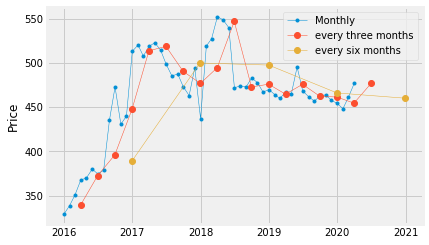

In [15]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Agric eggs medium size'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanpriceegg1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanpriceegg2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();
#the data points are so few taht i don't think creating a rolling mean plot will smoothen it out any more


one can see that prices rose dramatically in from 2016-2017, with a slight drop in 2018-2019 but never fully dropping there is still a slow downward slight the sampling even gives a rough estimate of slightly over 450 naira as the ne price of eggs in by the end of this year.

In [16]:
meanrice1 = newfoodprice['Rice local sold loose'].resample("Q").mean()
meanrice2 = newfoodprice['Rice local sold loose'].resample("BA").mean()

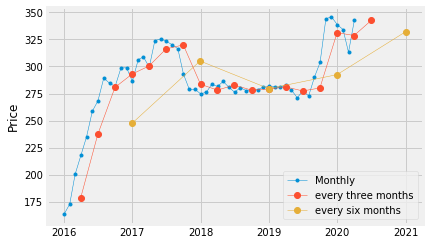

In [17]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Rice local sold loose'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanrice1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanrice2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();


one can see that prices rose dramatically in from 2016-2017, with a slight drop in 2017-2018 but never fully dropping there is, there was a sharp rise in food pricing in 2019 and it continues to rise. with a rough estimate of of 325 naira per kilogram by the end of this year

In [18]:
meanrice3 = newfoodprice['Rice,imported high quality sold loose'].resample("Q").mean()
meanrice4 = newfoodprice['Rice,imported high quality sold loose'].resample("BA").mean()

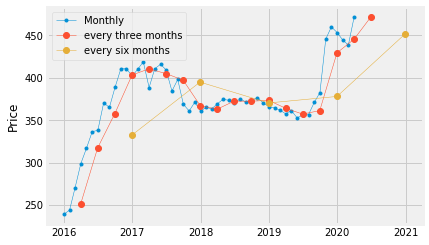

In [19]:
fig,ax= plt.subplots()
ax.plot(newfoodprice['Rice,imported high quality sold loose'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanrice3, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanrice4, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

one can see that prices rose dramatically in from 2016-2017, with a slight drop in 2017-2018 but never fully dropping there is, there was a sharp rise in food pricing in the last quarter of 2019 and it continues to rise. with a rough estimate of of 450 naira per kilogram by the end of this year, and almost 500 naira by june. 

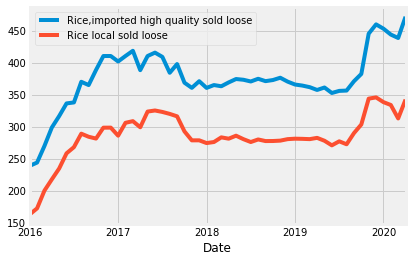

In [20]:
newfoodprice['Rice,imported high quality sold loose'].plot()
newfoodprice['Rice local sold loose'].plot()
plt.legend(['Rice,imported high quality sold loose','Rice local sold loose'])
plt.show()

local and imported rice follow the same pricing trend with the imported one constantly more expensive

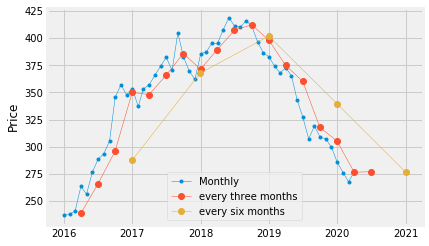

In [21]:
meanbean1 = newfoodprice['Beans brown,sold loose'].resample("Q").mean()
meanbean2 = newfoodprice['Beans brown,sold loose'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beans brown,sold loose'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanbean1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanbean2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

beans is generally seeing dramatic drop in price over the last two years and appears tobe returning to 2016 prices

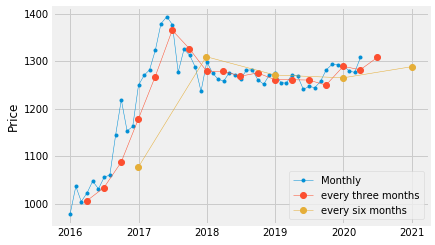

In [22]:
meanbeef1 = newfoodprice['Beef,boneless'].resample("Q").mean()
meanbeef2 = newfoodprice['Beef,boneless'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Beef,boneless'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanbeef1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanbeef2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

one can see that prices rose dramatically in from 2016-2017, with a slight drop in 2017-2018 but never fully dropping there is, there was a slight rise in beef pricing in the last quarter of 2019 and it continues to rise. with a rough estimate of 1300 naira per kilogram by the end of this year, and slightly above 1300 naira by june. 

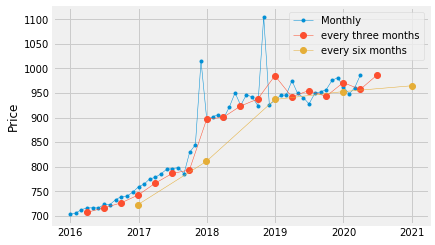

In [23]:
meanfish1 = newfoodprice['Titus:frozen'].resample("Q").mean()
meanfish2 = newfoodprice['Titus:frozen'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Titus:frozen'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanfish1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanfish2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

 frozen prices rose slowly in from 2016-2018,but a large spike in fish prices in the last quarter of 2018,the prices dipped but remain high throughout 2018 with another spike in  and it continues to rise. with a rough estimate of slightly above 950 naira per kilogram by the end of this year, and closer to 1000 naira by june.

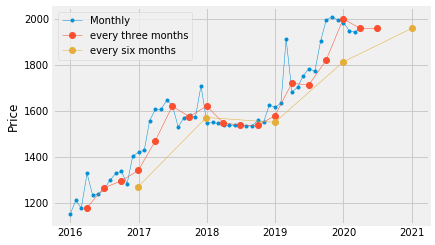

In [24]:
meanchicken1 = newfoodprice['Frozen chicken'].resample("Q").mean()
meanchicken2 = newfoodprice['Frozen chicken'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Frozen chicken'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanchicken1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanchicken2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

chicken prices have been ina upward trajectory in the past four years,with the prices estimated to rise even further,with this year

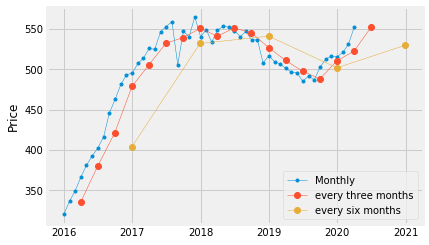

In [25]:
meanvegoil1 = newfoodprice['Vegetable oil:1 bottle,specify bottle'].resample("Q").mean()
meanvegoil2 = newfoodprice['Vegetable oil:1 bottle,specify bottle'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Vegetable oil:1 bottle,specify bottle'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanvegoil1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanvegoil2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

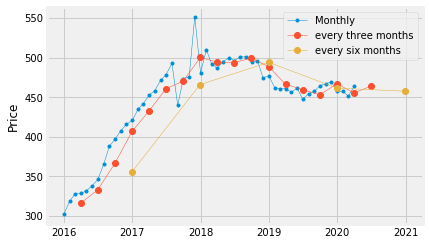

In [26]:
meanpoil1 = newfoodprice['Palm oil: 1 bottle,specify bottle'].resample("Q").mean()
meanpoil2 = newfoodprice['Palm oil: 1 bottle,specify bottle'].resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(newfoodprice['Palm oil: 1 bottle,specify bottle'], marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meanpoil1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meanpoil2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

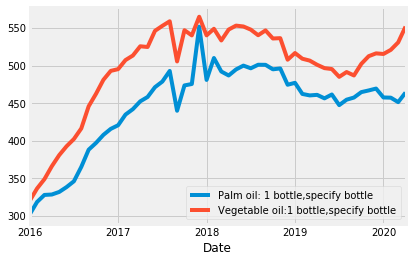

In [27]:
newfoodprice['Palm oil: 1 bottle,specify bottle'].plot()
newfoodprice['Vegetable oil:1 bottle,specify bottle'].plot()
plt.legend(['Palm oil: 1 bottle,specify bottle','Vegetable oil:1 bottle,specify bottle'])
plt.show()

palm oil and vegetable generally followed the same trend in the past four years with palm oil generally lower than vegetable oil pricing.

## Assumed total expenditure
assuming an individual purchases all of these items monthly the total expenditure tht give an insight in the general cost of food in Nigeria

In [28]:
totalapprox = newfoodprice.sum(axis=1)

In [29]:
totalapprox.head()

Date
2016-01-01    20877.18
2016-02-01    21441.25
2016-03-01    21553.85
2016-04-01    22237.28
2016-05-01    22650.85
dtype: float64

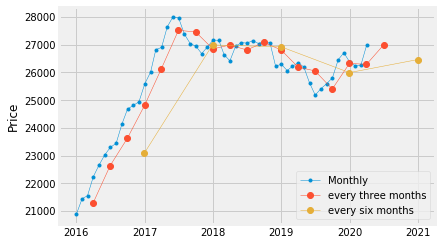

In [30]:
meantotal1 = totalapprox.resample("Q").mean()
meantotal2 =totalapprox.resample("BA").mean()
fig,ax= plt.subplots()
ax.plot(totalapprox, marker ='.',linewidth=0.5,label='Monthly')
ax.plot(meantotal1, marker ='o',linewidth=0.5,label='every three months')
ax.plot(meantotal2, marker ='o',linewidth=0.5,label='every six months')
ax.set_ylabel('Price')
ax.legend();

this further showcases the most common trend of slight upward price increase after a period of relative price stability

# Autocorrelation
From the graph below five five lag will be a reasonable parameters to use for my forcasting models

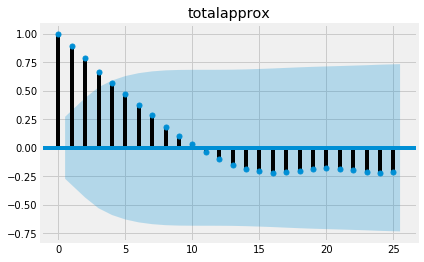

In [31]:
plot_acf(totalapprox,lags=25,title='totalapprox')
plt.show()

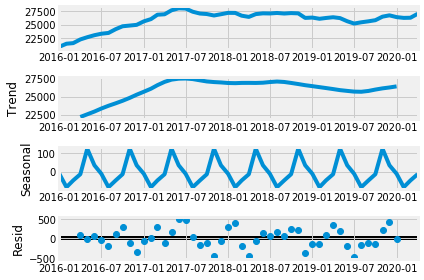

In [32]:
decomposed_total = sm.tsa.seasonal_decompose(totalapprox,freq=6)# The frequncy is six months
figure= decomposed_total.plot()

The data is showing signs of seasonality, and a slight upward trend in recent times after a period of stability

## Fitting model

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   51
Model:                     ARMA(5, 0)   Log Likelihood                -369.856
Method:                       css-mle   S.D. of innovations            340.385
Date:                Mon, 22 Jun 2020   AIC                            753.712
Time:                        11:31:11   BIC                            767.235
Sample:                             0   HQIC                           758.880
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.4007    100.236      1.431      0.153     -53.059     339.860
ar.L1.y        0.3734      0.144      2.591      0.010       0.091       0.656
ar.L2.y        0.0161      0.154      0.105      0.9

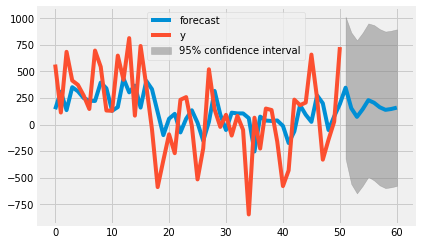

In [33]:
model = ARMA(totalapprox.diff().iloc[1:].values, order=(5,0))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=0,end=60)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   50
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -364.721
Method:                       css-mle   S.D. of innovations            353.365
Date:                Mon, 22 Jun 2020   AIC                            743.443
Time:                        11:31:13   BIC                            756.827
Sample:                             1   HQIC                           748.539
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3818     17.820     -0.246      0.806     -39.308      30.544
ar.L1.D.y     -0.5363      0.144     -3.719      0.000      -0.819      -0.254
ar.L2.D.y     -0.4694      0.160     -2.943      0.0

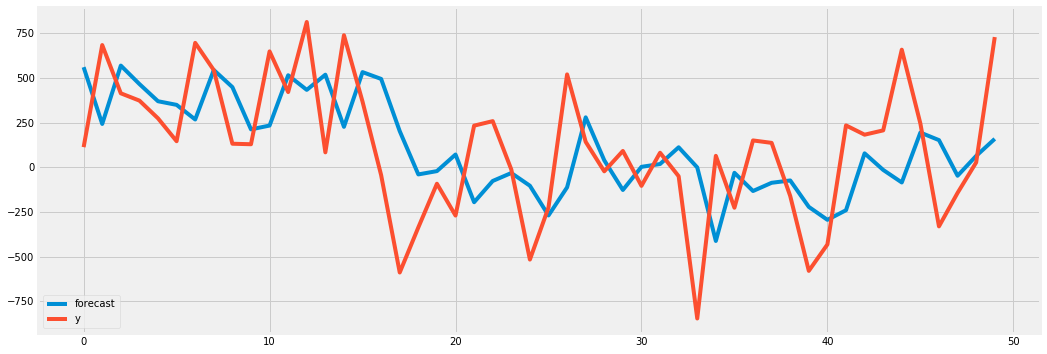

In [34]:
rcParams['figure.figsize'] = 16, 6
model = ARIMA(totalapprox.diff().iloc[1:].values, order=(5,1,0))
result = model.fit()
print(result.summary())
result.plot_predict()
plt.show()

## Forecasting 

## ARMA

This sets the lag value to 5 for autoregressionand uses a moving average model of 0.

predicted=25780.502346, expected=26296.030000
predicted=26183.507372, expected=26069.930000
predicted=25904.362376, expected=26220.040000
predicted=25958.784870, expected=26356.520000
predicted=26393.412827, expected=26195.900000
predicted=26084.994187, expected=25616.800000
predicted=25387.918989, expected=25185.370000
predicted=24949.638595, expected=25419.440000
predicted=25402.822484, expected=25601.690000
predicted=25533.420840, expected=25807.990000
predicted=25777.284882, expected=26465.580000
predicted=26753.368999, expected=26710.160000
predicted=26863.482109, expected=26379.800000
predicted=26258.863914, expected=26236.570000
predicted=26213.018281, expected=26263.670000
predicted=26257.967200, expected=26991.700000
Test MSE: 151399.954


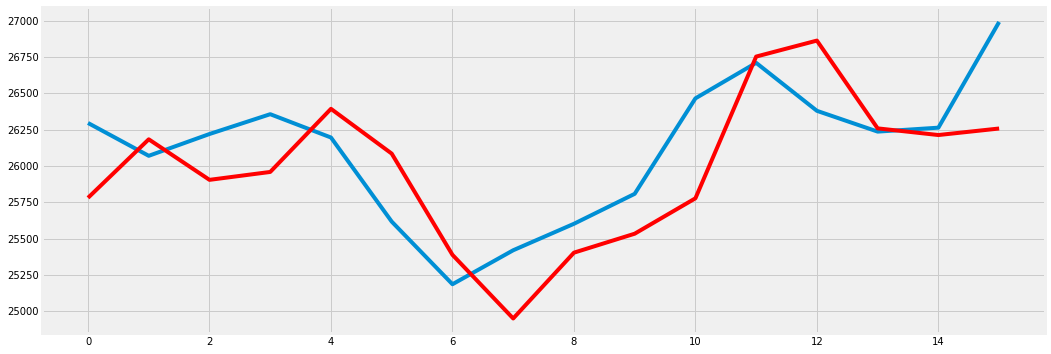

In [35]:
X = totalapprox.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)] #seperating my timeseries data into train and test data
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARMA(history, order=(5,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

the model follows a smilar trend as the actual value but undershoots the value

## ARIMA

This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

predicted=27225.357690, expected=27077.300000
predicted=27170.821517, expected=26232.020000
predicted=25923.274254, expected=26296.030000
predicted=26332.694790, expected=26069.930000
predicted=26054.264708, expected=26220.040000
predicted=26141.869915, expected=26356.520000
predicted=26422.259248, expected=26195.900000
predicted=26206.029748, expected=25616.800000
predicted=25447.739072, expected=25185.370000
predicted=25049.014187, expected=25419.440000
predicted=25525.726124, expected=25601.690000
predicted=25633.166510, expected=25807.990000
predicted=25790.000648, expected=26465.580000
predicted=26771.646746, expected=26710.160000
predicted=26941.037396, expected=26379.800000
predicted=26351.774265, expected=26236.570000
predicted=26296.803197, expected=26263.670000
predicted=26391.062229, expected=26991.700000
Test MSE: 165330.305


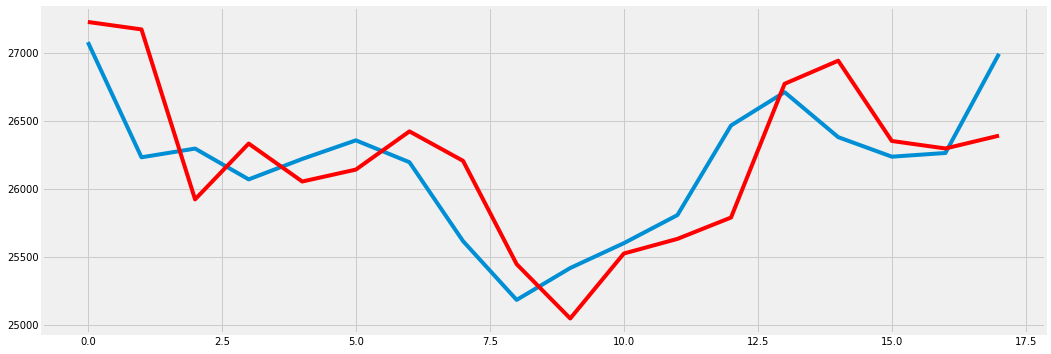

In [36]:
X = totalapprox.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

this model is far more accurate than the ARMA model but might be overfitted because there are so few data points

# Recommendations

* explore more food item because a glimpse of the data shows taht some food prices differ widely from the general trend
* increase the data quantity(this data is provided by the Nigerian bureau of statistics and is limited to 2016), the best option will be to revisit the the data in a few years
* use better models